# Problem statement

I am a saler and i want to know the amount of money the customer is willing to pay for the right price given th following attributes:
0) Number of sales of the product
1) the price 
2) the title of the product
3) the ratings of the price
4) nb_image
5) description score
6) imges score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', 100)

construct a model that would predict the temporal evolution of sales

In [2]:
df= pd.read_csv('dataset_to_predict.csv')

In [3]:
df.head(30)

,dates,keyword,title,product_id,ranks,price,reviews,ratings,nb_image,a_plus,description_score,nb_bullets_points,image_score,sales
0,2021-01-01,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,0.0,45.0,36.34,168.0,4.327325,5.0,NaN,0.311871,2.0,0.524923,17.0
1,2021-01-02,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,0.0,21.0,36.34,NaN,4.336569,5.0,1.0,0.429192,2.0,0.524923,35.0
2,2021-01-03,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,0.0,37.0,36.34,168.0,4.336065,5.0,1.0,0.421836,2.0,0.524923,10.0
3,2021-01-04,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,NaN,11.0,NaN,NaN,4.322506,5.0,1.0,0.488681,2.0,0.524923,16.0
4,2021-01-05,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,0.0,14.0,36.34,168.0,4.334201,5.0,1.0,0.620089,2.0,0.524923,29.0
5,2021-01-06,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,0.0,41.0,36.34,168.0,4.326861,5.0,1.0,0.471951,2.0,0.524923,11.0
6,2021-01-07,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,NaN,29.0,36.34,168.0,4.319678,5.0,1.0,0.386614,2.0,NaN,26.0
7,2021-01-08,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,0.0,NaN,NaN,168.0,4.323429,5.0,1.0,0.359867,2.0,0.524923,21.0
8,2021-01-09,NaN,Changing Lifestyles Safe-er-Grip Bathtub and S...,0.0,NaN,36.34,168.0,4.307192,NaN,1.0,0.519688,2.0,0.524923,9.0
9,2021-01-10,dog dental chews,Changing Lifestyles Safe-er-Grip Bathtub and S...,0.0,40.0,36.34,168.0,4.312115,5.0,1.0,0.671013,2.0,NaN,12.0


In [4]:
df.shape

(1032913, 14)

In [5]:
df['product_id'].tail(20)

1032893    2499.0
1032894    2499.0
1032895    2499.0
1032896    2499.0
1032897    2499.0
1032898    2499.0
1032899    2499.0
1032900       NaN
1032901    2499.0
1032902    2499.0
1032903    2499.0
1032904    2499.0
1032905    2499.0
1032906    2499.0
1032907    2499.0
1032908    2499.0
1032909    2499.0
1032910    2499.0
1032911    2499.0
1032912    2499.0
Name: product_id, dtype: float64

In [6]:
df['keyword'].tail(20)

1032893    black high waisted shorts
1032894    black high waisted shorts
1032895    black high waisted shorts
1032896                          NaN
1032897    black high waisted shorts
1032898    black high waisted shorts
1032899    black high waisted shorts
1032900    black high waisted shorts
1032901    black high waisted shorts
1032902    black high waisted shorts
1032903                          NaN
1032904    black high waisted shorts
1032905    black high waisted shorts
1032906    black high waisted shorts
1032907    black high waisted shorts
1032908    black high waisted shorts
1032909    black high waisted shorts
1032910    black high waisted shorts
1032911    black high waisted shorts
1032912    black high waisted shorts
Name: keyword, dtype: object

In [7]:
df['title']

0          Changing Lifestyles Safe-er-Grip Bathtub and S...
1          Changing Lifestyles Safe-er-Grip Bathtub and S...
2          Changing Lifestyles Safe-er-Grip Bathtub and S...
3          Changing Lifestyles Safe-er-Grip Bathtub and S...
4          Changing Lifestyles Safe-er-Grip Bathtub and S...
                                 ...                        
1032908    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032909    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032910    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032911    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032912    Ubbie Kids Desk and Chair Set, Height Adjustab...
Name: title, Length: 1032913, dtype: object

In [8]:
df.columns

Index(['dates', 'keyword', 'title', 'product_id', 'ranks', 'price', 'reviews',
       'ratings', 'nb_image', 'a_plus', 'description_score',
       'nb_bullets_points', 'image_score', 'sales'],
      dtype='object')

In [9]:
df.title

0          Changing Lifestyles Safe-er-Grip Bathtub and S...
1          Changing Lifestyles Safe-er-Grip Bathtub and S...
2          Changing Lifestyles Safe-er-Grip Bathtub and S...
3          Changing Lifestyles Safe-er-Grip Bathtub and S...
4          Changing Lifestyles Safe-er-Grip Bathtub and S...
                                 ...                        
1032908    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032909    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032910    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032911    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032912    Ubbie Kids Desk and Chair Set, Height Adjustab...
Name: title, Length: 1032913, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032913 entries, 0 to 1032912
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   dates              1032913 non-null  object 
 1   keyword            929515 non-null   object 
 2   title              929332 non-null   object 
 3   product_id         929694 non-null   float64
 4   ranks              929405 non-null   float64
 5   price              929287 non-null   float64
 6   reviews            929248 non-null   float64
 7   ratings            929997 non-null   float64
 8   nb_image           929558 non-null   float64
 9   a_plus             929261 non-null   float64
 10  description_score  929854 non-null   float64
 11  nb_bullets_points  929691 non-null   float64
 12  image_score        930181 non-null   float64
 13  sales              878929 non-null   float64
dtypes: float64(11), object(3)
memory usage: 110.3+ MB


# Check data cleaning

In [11]:
df.isna().sum()

dates                     0
keyword              103398
title                103581
product_id           103219
ranks                103508
price                103626
reviews              103665
ratings              102916
nb_image             103355
a_plus               103652
description_score    103059
nb_bullets_points    103222
image_score          102732
sales                153984
dtype: int64

In [12]:
df_fixed = df.interpolate(inplace=False)

In [13]:
df_fixed.isna().sum()

dates                     0
keyword              103398
title                103581
product_id                0
ranks                     0
price                     0
reviews                   0
ratings                   0
nb_image                  0
a_plus                    1
description_score         0
nb_bullets_points         0
image_score               0
sales                     0
dtype: int64

In [14]:
df_fixed['a_plus'].unique()

array([       nan, 1.        , 0.        , 0.5       , 0.16666667,
       0.33333333, 0.66666667, 0.83333333, 0.66666667, 0.33333333,
       0.25      , 0.75      ])

In [15]:
df_fixed.dropna(inplace =True)

In [16]:
df_fixed.isna().sum()

dates                0
keyword              0
title                0
product_id           0
ranks                0
price                0
reviews              0
ratings              0
nb_image             0
a_plus               0
description_score    0
nb_bullets_points    0
image_score          0
sales                0
dtype: int64

In [17]:
df_fixed['title']

1          Changing Lifestyles Safe-er-Grip Bathtub and S...
2          Changing Lifestyles Safe-er-Grip Bathtub and S...
3          Changing Lifestyles Safe-er-Grip Bathtub and S...
4          Changing Lifestyles Safe-er-Grip Bathtub and S...
5          Changing Lifestyles Safe-er-Grip Bathtub and S...
                                 ...                        
1032908    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032909    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032910    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032911    Ubbie Kids Desk and Chair Set, Height Adjustab...
1032912    Ubbie Kids Desk and Chair Set, Height Adjustab...
Name: title, Length: 836239, dtype: object

In [18]:
df_fixed = df_fixed.drop(['title'], axis=1)

In [19]:
df_fixed.tail()

,dates,keyword,product_id,ranks,price,reviews,ratings,nb_image,a_plus,description_score,nb_bullets_points,image_score,sales
1032908,2021-02-24,black high waisted shorts,2499.0,354.0,29.22,30.5,4.396493,7.0,1.0,0.701054,5.0,0.451809,94.0
1032909,2021-02-25,black high waisted shorts,2499.0,359.0,29.22,32.0,4.407939,7.0,1.0,0.730596,5.0,0.451809,94.0
1032910,2021-02-26,black high waisted shorts,2499.0,353.0,29.22,34.0,4.370798,7.0,1.0,0.892210,5.0,0.451809,94.0
1032911,2021-02-27,black high waisted shorts,2499.0,360.0,29.22,34.0,4.402303,7.0,1.0,0.750830,5.0,0.451809,94.0
1032912,2021-02-28,black high waisted shorts,2499.0,351.0,29.22,36.0,4.427188,7.0,1.0,0.750830,5.0,0.451809,94.0


# Convert dates into float

# Important feature correlation

<AxesSubplot:>

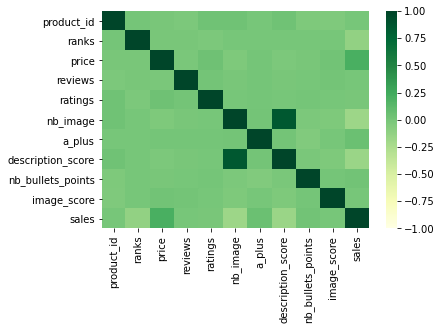

In [20]:
sns.heatmap(df.corr(), vmin=-1, cmap='YlGn')

Interpretation: there is 2 main features with correlation ratio:
1) nb_image: for the description of the product
2) description score

In [21]:
df.isna().sum()

dates                     0
keyword              103398
title                103581
product_id           103219
ranks                103508
price                103626
reviews              103665
ratings              102916
nb_image             103355
a_plus               103652
description_score    103059
nb_bullets_points    103222
image_score          102732
sales                153984
dtype: int64

<AxesSubplot:>

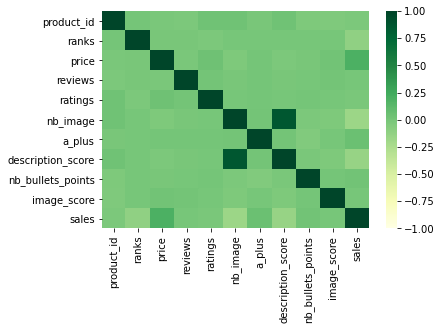

In [22]:
sns.heatmap(df_fixed.corr(), vmin=-1, cmap='YlGn')

In [23]:
df_fixed.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
product_id,836239.0,1248.33,718.06,0.00,635.00,1241.00,1865.00,2499.00
ranks,836239.0,128.98,90.84,1.00,54.00,124.00,194.00,739.00
price,836239.0,36.01,6.49,10.61,31.69,35.88,40.40,53.81
reviews,836239.0,96.08,2420.20,1.00,6.00,15.00,38.00,119737.00
ratings,836239.0,4.00,0.61,2.33,3.52,4.00,4.53,5.00
nb_image,836239.0,2.99,1.71,0.00,2.00,3.00,4.00,9.00
a_plus,836239.0,0.79,0.41,0.00,1.00,1.00,1.00,1.00
description_score,836239.0,0.30,0.19,0.00,0.16,0.28,0.42,1.00
nb_bullets_points,836239.0,2.96,1.70,0.00,2.00,3.00,4.00,13.00
image_score,836239.0,0.50,0.29,0.00,0.26,0.49,0.74,1.00


# Data visualization

<AxesSubplot:xlabel='sales', ylabel='Count'>

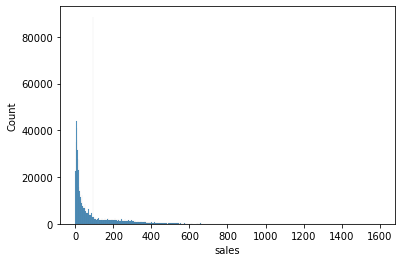

In [24]:
sns.histplot(df_fixed['sales'])

In [25]:
df_fixed.price

1          36.34
2          36.34
3          36.34
4          36.34
5          36.34
           ...  
1032908    29.22
1032909    29.22
1032910    29.22
1032911    29.22
1032912    29.22
Name: price, Length: 836239, dtype: float64

In [26]:
df_fixed.sales.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

94.000000     87153
5.000000      21731
6.000000      20706
7.000000      20205
4.000000      19183
              ...  
112.034483        1
184.965517        1
208.517241        1
200.965517        1
152.931034        1
Name: sales, Length: 6941, dtype: int64

In [27]:
order_data = df_fixed['keyword'].value_counts().iloc[:100].index

<AxesSubplot:xlabel='count', ylabel='keyword'>

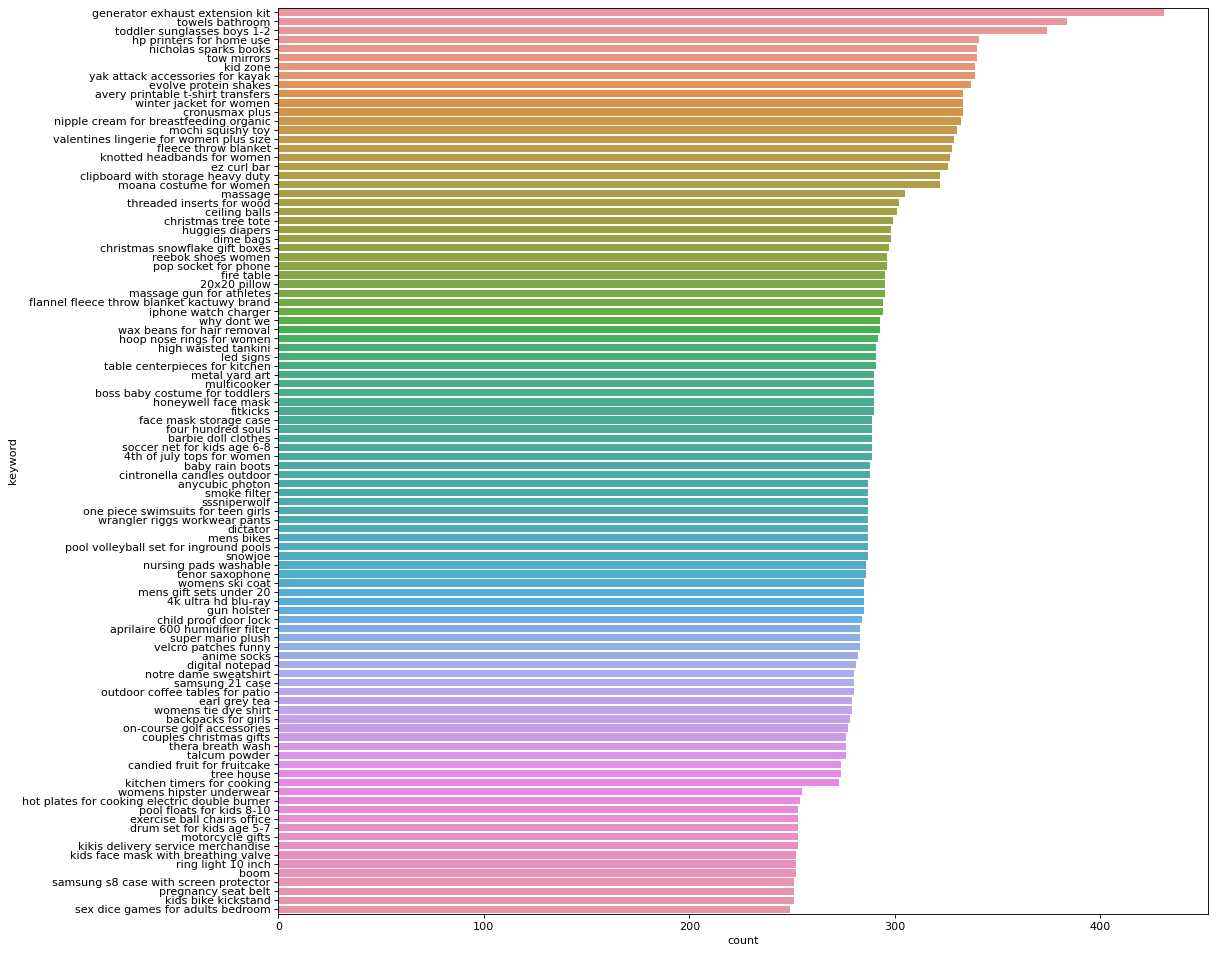

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=80)
sns.countplot(y='keyword', data= df_fixed, order=order_data )

<AxesSubplot:xlabel='count', ylabel='sales'>

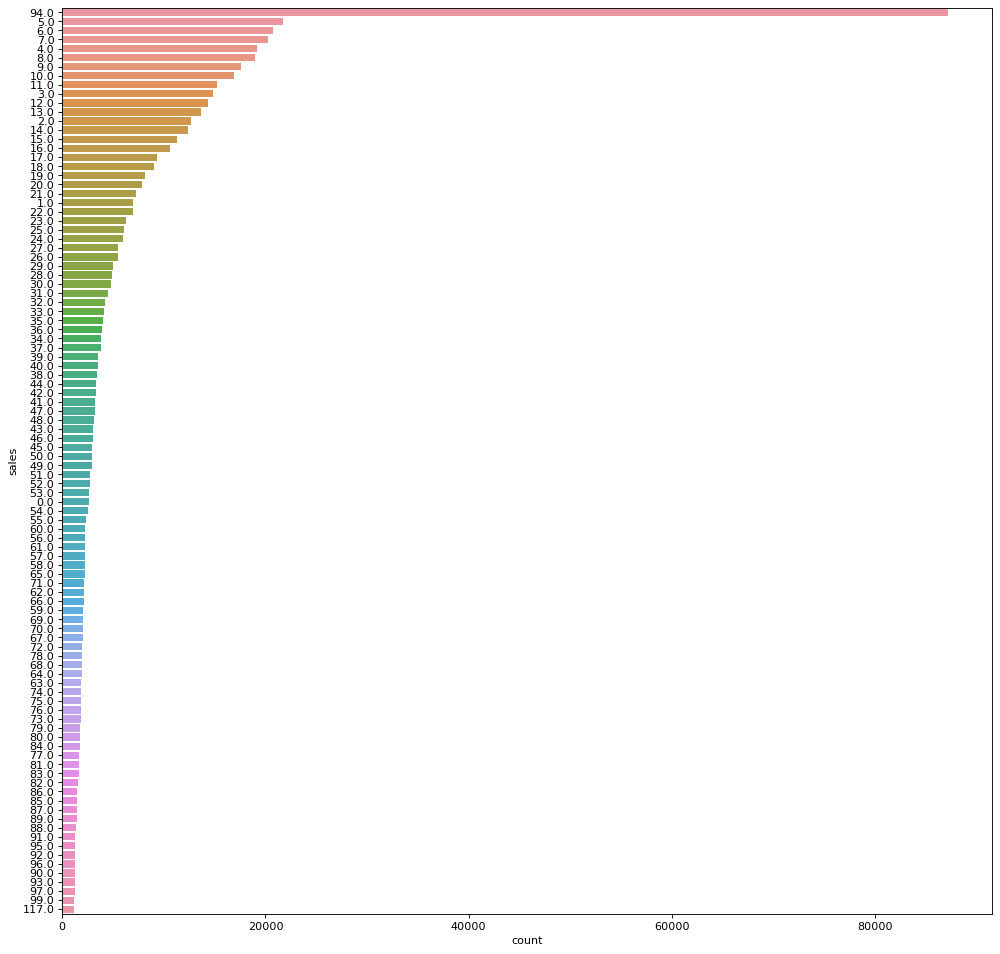

In [29]:
order_sales = df_fixed['sales'].value_counts().iloc[:100].index
figure(figsize=(15, 15), dpi=80)
sns.countplot(y='sales', data= df_fixed, order=order_sales )

In [30]:
df_fixed.index = pd.DatetimeIndex(df_fixed.dates)

In [31]:
df_fixed.resample('M').size()

dates
2021-01-31    439404
2021-02-28    396835
Freq: M, dtype: int64

Text(0, 0.5, 'Number of sales')

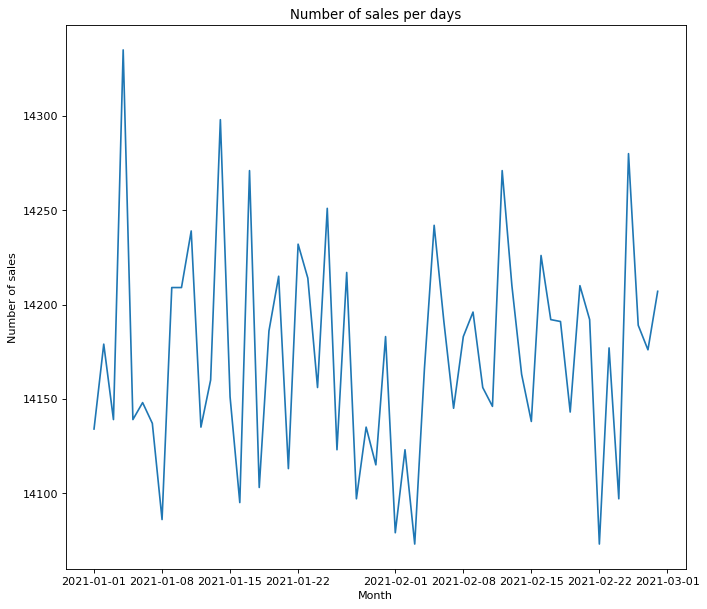

In [32]:
figure(figsize=(10, 9), dpi=80)
plt.plot(df_fixed.resample('d').size())
plt.title('Number of sales per days')
plt.xlabel('Month')
plt.ylabel('Number of sales')

<AxesSubplot:xlabel='dates'>

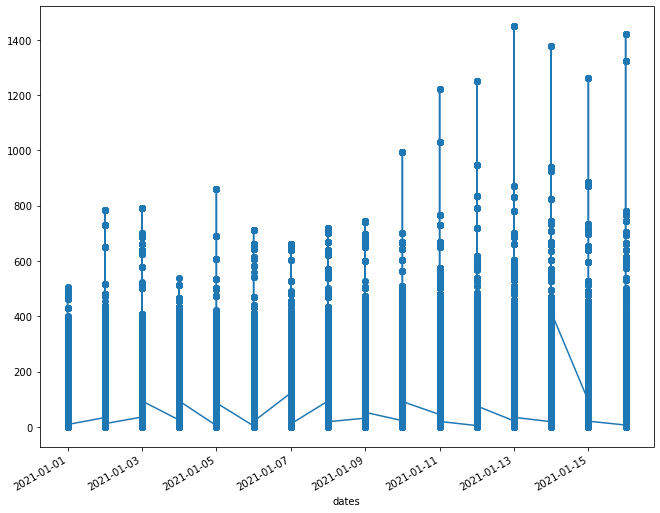

In [33]:
df_fixed.loc['2021-01-01': '2021-01-16','sales'].plot(marker = 'o', figsize=(11, 9))

In [34]:
df_fixed.keyword

dates
2021-01-02             dog dental chews
2021-01-03             dog dental chews
2021-01-04             dog dental chews
2021-01-05             dog dental chews
2021-01-06             dog dental chews
                        ...            
2021-02-24    black high waisted shorts
2021-02-25    black high waisted shorts
2021-02-26    black high waisted shorts
2021-02-27    black high waisted shorts
2021-02-28    black high waisted shorts
Name: keyword, Length: 836239, dtype: object

In [35]:
df_fixed.to_csv("new_df_fixed_DataHawk.csv")

# Dataframe for each product_id

In [36]:
len(df_fixed.product_id[0:1])

1

In [37]:
d = {}
for i in range(len(df_fixed.product_id[0:1])):
    d[i] = pd.DataFrame()
    d[i] = df_fixed.loc[(df_fixed['product_id'] == i)]
    #d[i]=df_fixed['dates','ranks','price','reviews','ratings','nb_image','a_plus','description_score','nb_bullets_points','image_score','sales']

In [38]:
df2 = df_fixed.groupby('product_id', as_index=False).agg(lambda x: x.tolist())

In [39]:
df2

,product_id,dates,keyword,ranks,price,reviews,ratings,nb_image,a_plus,description_score,nb_bullets_points,image_score,sales
0,0.000000,"[2021-01-02, 2021-01-03, 2021-01-04, 2021-01-0...","[dog dental chews, dog dental chews, dog denta...","[21.0, 37.0, 11.0, 14.0, 41.0, 29.0, 32.666666...","[36.34, 36.34, 36.34, 36.34, 36.34, 36.34, 36....","[168.0, 168.0, 168.0, 168.0, 168.0, 168.0, 168...","[4.3365687983270576, 4.336064623029114, 4.3225...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.42919181432064935, 0.4218357545437461, 0.48...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[0.5249228183596735, 0.5249228183596735, 0.524...","[35.0, 10.0, 16.0, 29.0, 11.0, 26.0, 21.0, 12...."
1,1.000000,"[2021-01-01, 2021-01-02, 2021-01-03, 2021-01-0...","[card puller for long nails, card puller for l...","[166.0, 162.0, 153.0, 163.0, 157.0, 130.0, 123...","[33.17, 33.17, 33.17, 33.17, 33.17, 33.17, 33....","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[3.871420020803702, 3.8510408024462497, 3.8782...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.3085875246441679, 0.11236214443547306, 0.18...","[1.3333333333333335, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9296402966917552, 0.9296402966917552, 0.929...","[6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 7.0, ..."
2,1.333333,[2021-01-01],[cerave hydrating cleanser],[8.0],[41.96],[109.0],[3.803259144209361],[3.0],[1.0],[0.2741680816944125],[4.0],[0.3021371305761138],[51.0]
3,1.666667,[2021-01-02],[cerave hydrating cleanser],[8.0],[41.96],[109.0],[3.819293735236567],[3.0],[1.0],[0.2944726107941157],[4.0],[0.3021371305761138],[50.0]
4,2.000000,"[2021-01-03, 2021-01-05, 2021-01-06, 2021-01-0...","[cerave hydrating cleanser, cerave hydrating c...","[9.0, 11.0, 14.0, 15.0, 16.5, 16.0, 15.0, 16.0...","[41.96, 41.96, 41.96, 41.96, 41.96, 41.96, 41....","[109.0, 109.0, 109.0, 109.0, 109.0, 109.0, 109...","[3.8133538602554418, 3.75657288938368, 3.73962...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.2823828525173465, 0.24110730881377346, 0.32...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[0.3021371305761138, 0.3021371305761138, 0.302...","[44.0, 49.0, 48.0, 45.0, 42.0, 30.0, 31.0, 30...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,2496.000000,"[2021-01-02, 2021-01-05, 2021-01-06, 2021-01-0...","[rockauto parts, rockauto parts, rockauto part...","[107.0, 142.0, 120.0, 146.0, 146.0, 134.0, 98....","[29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29....","[7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0, 11.0, 1...","[3.024144592601451, 3.061286247946338, 3.07007...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.11497116402152603, 0.29337954504474256, 0.0...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[0.4239396470366419, 0.4239396470366419, 0.423...","[94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94...."
2963,2497.000000,"[2021-01-01, 2021-01-04, 2021-01-05, 2021-01-0...","[dog mom gifts, dog mom gifts, dog mom gifts, ...","[228.0, 237.0, 220.5, 204.0, 216.0, 230.0, 242...","[37.32, 37.32, 37.32, 37.32, 37.32, 37.32, 37....","[3.0, 4.0, 4.0, 4.0, 4.0, 7.0, 8.0, 10.0, 10.0...","[3.671771852882276, 3.7185466703173145, 3.7004...","[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6848476817531384, 0.566594156306254, 0.5977...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[0.24911539574963404, 0.24911539574963404, 0.2...","[94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94...."
2964,2497.500000,[2021-01-01],[bliss light skylight],[92.0],[38.74],[1.0],[4.213308837436419],[4.0],[1.0],[0.24084633245798406],[2.0],[0.4479949477636156],[94.0]
2965,2498.000000,"[2021-01-03, 2021-01-05, 2021-01-06, 2021-01-0...","[bliss light skylight, bliss light skylight, b...","[92.0, 105.0, 103.0, 106.0,

In [40]:
df2.head(1)

,product_id,dates,keyword,ranks,price,reviews,ratings,nb_image,a_plus,description_score,nb_bullets_points,image_score,sales
0,0.0,"[2021-01-02, 2021-01-03, 2021-01-04, 2021-01-0...","[dog dental chews, dog dental chews, dog denta...","[21.0, 37.0, 11.0, 14.0, 41.0, 29.0, 32.666666...","[36.34, 36.34, 36.34, 36.34, 36.34, 36.34, 36....","[168.0, 168.0, 168.0, 168.0, 168.0, 168.0, 168...","[4.3365687983270576, 4.336064623029114, 4.3225...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.42919181432064935, 0.4218357545437461, 0.48...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[0.5249228183596735, 0.5249228183596735, 0.524...","[35.0, 10.0, 16.0, 29.0, 11.0, 26.0, 21.0, 12...."


In [41]:
%pprint
(df2.iloc[0])

Pretty printing has been turned OFF


product_id                                                           0
dates                [2021-01-02, 2021-01-03, 2021-01-04, 2021-01-0...
keyword              [dog dental chews, dog dental chews, dog denta...
ranks                [21.0, 37.0, 11.0, 14.0, 41.0, 29.0, 32.666666...
price                [36.34, 36.34, 36.34, 36.34, 36.34, 36.34, 36....
reviews              [168.0, 168.0, 168.0, 168.0, 168.0, 168.0, 168...
ratings              [4.3365687983270576, 4.336064623029114, 4.3225...
nb_image             [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...
a_plus               [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
description_score    [0.42919181432064935, 0.4218357545437461, 0.48...
nb_bullets_points    [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...
image_score          [0.5249228183596735, 0.5249228183596735, 0.524...
sales                [35.0, 10.0, 16.0, 29.0, 11.0, 26.0, 21.0, 12....
Name: 0, dtype: object

In [42]:
len(df2.iloc[0].price)

378

I have 378 products in my datadase

# Linear regression 

<AxesSubplot:xlabel='dates', ylabel='price'>

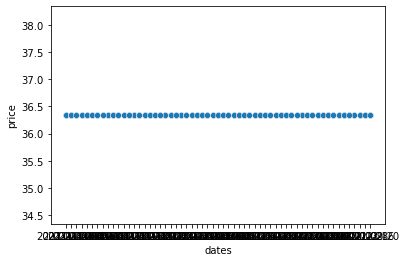

In [43]:
sns.scatterplot(data = df2.iloc[0], x = 'dates', y = 'price')

# Number of sales in time

<AxesSubplot:xlabel='dates', ylabel='sales'>

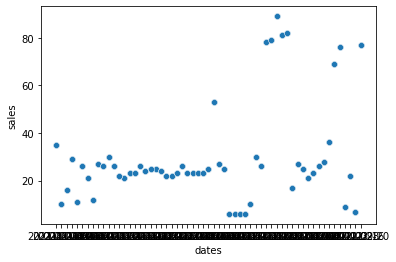

In [44]:
sns.scatterplot(data = df2.iloc[0], x = 'dates', y = 'sales')

# Checkin seasonality (peridodicity)

In [45]:
data_columns = ['sales']
data_monthly_max = df_fixed[data_columns].resample('W').max() # W stands for weekly data_monthly_max

# Rolling window

In [46]:
data_7d_rol = df_fixed[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol

,sales
dates,
2021-01-02,NaN
2021-01-03,NaN
2021-01-04,NaN
2021-01-05,21.142857
2021-01-06,17.857143
...,...
2021-02-24,94.000000
2021-02-25,94.000000
2021-02-26,NaN


# Visualising data

Text(0.5, 1.0, 'Trends in Sales')

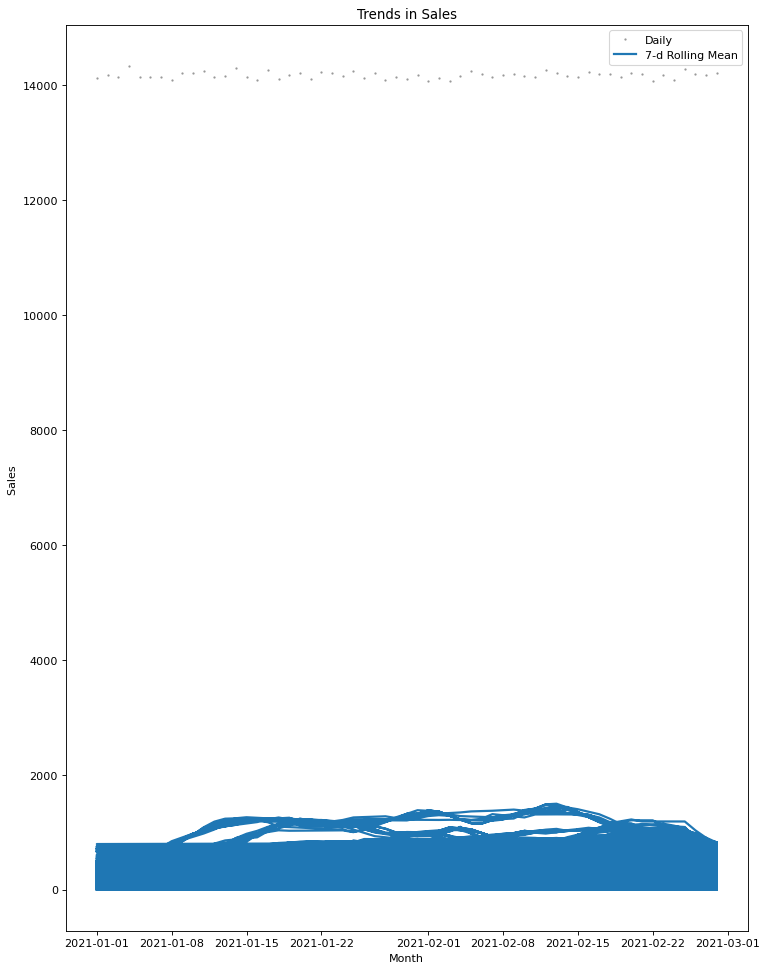

In [47]:
fig, ax = plt.subplots(figsize = (11,15),dpi=80)

# plotting daily data
ax.plot(df_fixed.resample('d').size(), marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['sales'], linewidth=2, label='7-d Rolling Mean')

# Niciification of plot
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Sales ')
ax.set_title('Trends in Sales')

 to remove trend from time series

In [48]:
df_fixed.resample('d').size()
# creating the first order differencing data
data_first_order_diff = df_fixed[data_columns].diff()

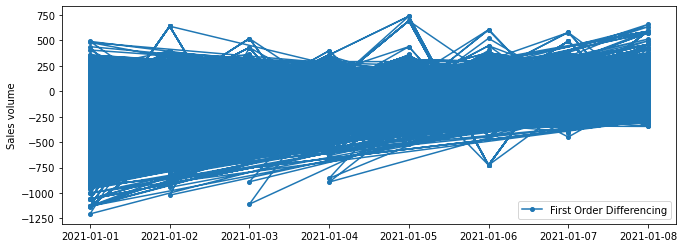

In [49]:
start, end = '2021-01-01', '2021-01-08'

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data_first_order_diff.loc[start:end, 'sales'],
marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('Sales volume')
ax.legend();

# Autocorrelation

KeyboardInterrupt: 

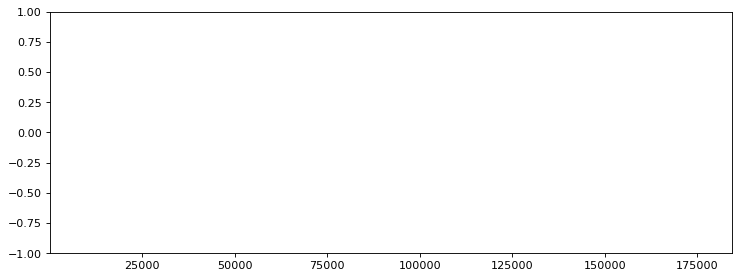

In [50]:
# plt.figure(figsize=(11,4), dpi= 80)
# pd.plotting.autocorrelation_plot(df_fixed.loc['2021-01-04': '2021-01-16', 'sales'])

In [ ]:
# plt.figure(figsize=(11,4), dpi= 80)
# pd.plotting.autocorrelation_plot(df_fixed.loc['2021-01-04': '2021-02-04', 'sales'])

In [51]:
from fbprophet import Prophet

In [52]:
dataHawk_prophet = df_fixed.resample('d').size().reset_index()

In [53]:
dataHawk_prophet

,dates,0
0,2021-01-01,14134
1,2021-01-02,14179
2,2021-01-03,14139
3,2021-01-04,14335
4,2021-01-05,14139
5,2021-01-06,14148
6,2021-01-07,14137
7,2021-01-08,14086
8,2021-01-09,14209
9,2021-01-10,14209


In [54]:
dataHawk_prophet.columns=['Date', 'Sales_Count']

In [55]:
dataHawk_prophet

,Date,Sales_Count
0,2021-01-01,14134
1,2021-01-02,14179
2,2021-01-03,14139
3,2021-01-04,14335
4,2021-01-05,14139
5,2021-01-06,14148
6,2021-01-07,14137
7,2021-01-08,14086
8,2021-01-09,14209
9,2021-01-10,14209


In [56]:
dataHawk_prophet_df_final = dataHawk_prophet.rename(columns={'Date':'ds', 'Sales_Count': 'y'})

In [57]:
dataHawk_prophet_df_final

,ds,y
0,2021-01-01,14134
1,2021-01-02,14179
2,2021-01-03,14139
3,2021-01-04,14335
4,2021-01-05,14139
5,2021-01-06,14148
6,2021-01-07,14137
7,2021-01-08,14086
8,2021-01-09,14209
9,2021-01-10,14209


In [58]:
dataHawk_prophet_df_final.to_csv("new_df.csv")

In [59]:
df_fixed.to_csv("new_df2.csv")

# Time serie prediction with fbProphet

In [ ]:
# from fbprophet import Prophet
# m = Prophet()
# m.fit(dataHawk_prophet_df_final)

In [ ]:
# from fbprophet import Prophet
# m = Prophet(daily_seasonality = True)
# m.fit(dataHawk_prophet_df_final)
# future = m.make_future_dataframe(periods=30, freq='M')
# forecast = m.predict(future)
# m.plot(forecast)
# m.plot_components(forecast)

In [ ]:
# from fbprophet import Prophet
# m = Prophet(daily_seasonality = True)
# m.fit(dataHawk_prophet_df_final)

# Time serie with scikit-learn

In [60]:
df_copy= df_fixed.copy()

In [61]:
df_copy.head()

,dates,keyword,product_id,ranks,price,reviews,ratings,nb_image,a_plus,description_score,nb_bullets_points,image_score,sales
dates,,,,,,,,,,,,,
2021-01-02,2021-01-02,dog dental chews,0.0,21.0,36.34,168.0,4.336569,5.0,1.0,0.429192,2.0,0.524923,35.0
2021-01-03,2021-01-03,dog dental chews,0.0,37.0,36.34,168.0,4.336065,5.0,1.0,0.421836,2.0,0.524923,10.0
2021-01-04,2021-01-04,dog dental chews,0.0,11.0,36.34,168.0,4.322506,5.0,1.0,0.488681,2.0,0.524923,16.0
2021-01-05,2021-01-05,dog dental chews,0.0,14.0,36.34,168.0,4.334201,5.0,1.0,0.620089,2.0,0.524923,29.0
2021-01-06,2021-01-06,dog dental chews,0.0,41.0,36.34,168.0,4.326861,5.0,1.0,0.471951,2.0,0.524923,11.0


In [62]:
# to explicitly convert the date column to type DATETIME
df_copy['Date'] = pd.to_datetime(df_copy['dates'])
data = df_copy.set_index('Date')
data.head()

,dates,keyword,product_id,ranks,price,reviews,ratings,nb_image,a_plus,description_score,nb_bullets_points,image_score,sales
Date,,,,,,,,,,,,,
2021-01-02,2021-01-02,dog dental chews,0.0,21.0,36.34,168.0,4.336569,5.0,1.0,0.429192,2.0,0.524923,35.0
2021-01-03,2021-01-03,dog dental chews,0.0,37.0,36.34,168.0,4.336065,5.0,1.0,0.421836,2.0,0.524923,10.0
2021-01-04,2021-01-04,dog dental chews,0.0,11.0,36.34,168.0,4.322506,5.0,1.0,0.488681,2.0,0.524923,16.0
2021-01-05,2021-01-05,dog dental chews,0.0,14.0,36.34,168.0,4.334201,5.0,1.0,0.620089,2.0,0.524923,29.0
2021-01-06,2021-01-06,dog dental chews,0.0,41.0,36.34,168.0,4.326861,5.0,1.0,0.471951,2.0,0.524923,11.0


In [66]:
# to explicitly convert the date column to type DATETIME
data['dates'] = pd.to_datetime(data['dates'])
data = data.set_index('dates')
data.head()

,keyword,product_id,ranks,price,reviews,ratings,nb_image,a_plus,description_score,nb_bullets_points,image_score,sales
dates,,,,,,,,,,,,
2021-01-02,dog dental chews,0.0,21.0,36.34,168.0,4.336569,5.0,1.0,0.429192,2.0,0.524923,35.0
2021-01-03,dog dental chews,0.0,37.0,36.34,168.0,4.336065,5.0,1.0,0.421836,2.0,0.524923,10.0
2021-01-04,dog dental chews,0.0,11.0,36.34,168.0,4.322506,5.0,1.0,0.488681,2.0,0.524923,16.0
2021-01-05,dog dental chews,0.0,14.0,36.34,168.0,4.334201,5.0,1.0,0.620089,2.0,0.524923,29.0
2021-01-06,dog dental chews,0.0,41.0,36.34,168.0,4.326861,5.0,1.0,0.471951,2.0,0.524923,11.0


# Data normalization

In [67]:
#Data normalization
X=data.drop(['keyword','sales'], axis=1)
y = data['sales']
X.shape
y.shape

(836239,)

In [68]:
X=data.drop(['keyword','sales'], axis=1)
y = data['sales']
X.shape
y.shape

(836239,)

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y=y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [70]:
y_scaled.shape

(836239, 1)

To print all performance metrics relevant to a regression task (such as MAE and R-square), we will be defining the regression_results function.

In [71]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

a simplistic model, one that predicts today’s consumption value based on
yesterday’s consumption value and;
difference between yesterday and the day before yesterday’s consumption value.

In [72]:
# creating new dataframe from consumption column
data_consumption = data[['sales']]
# inserting new column with yesterday's consumption values
data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'sales'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff()
# dropping NAs
data_consumption = data_consumption.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [73]:
data_consumption.tail()
#len(data_consumption.sales)

,sales,Yesterday,Yesterday_Diff
dates,,,
2021-02-24,94.0,94.0,0.0
2021-02-25,94.0,94.0,0.0
2021-02-26,94.0,94.0,0.0
2021-02-27,94.0,94.0,0.0
2021-02-28,94.0,94.0,0.0


In [74]:
print(data_consumption.loc['2021-02-01':])

            sales  Yesterday  Yesterday_Diff
dates                                       
2021-02-01   23.0       23.0            -3.0
2021-02-04   23.0       23.0             0.0
2021-02-05   23.0       23.0             0.0
2021-02-06   25.0       23.0             0.0
2021-02-08   53.0       25.0             2.0
...           ...        ...             ...
2021-02-24   94.0       94.0             0.0
2021-02-25   94.0       94.0             0.0
2021-02-26   94.0       94.0             0.0
2021-02-27   94.0       94.0             0.0
2021-02-28   94.0       94.0             0.0

[396835 rows x 3 columns]


# Defining training and test sets

In [75]:
X_train = data_consumption.loc['2021-01-01':'2021-01-24'].drop(['sales'], axis = 1)
y_train = data_consumption.loc['2021-01-01':'2021-01-24', 'sales']
X_test = data_consumption.loc['2021-02-01':].drop(['sales'], axis = 1)
y_test = data_consumption.loc['2021-02-01':, 'sales']


# X_train = data_consumption[:'2016'].drop(['Consumption'], axis = 1)
# y_train = data_consumption.loc[:'2016', 'Consumption']
# X_test = data_consumption['2017'].drop(['Consumption'], axis = 1)
# y_test = data_consumption.loc['2017', 'Consumption']

# Scaling

In [76]:
scaler_data = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
y=y_train.values.reshape(-1,1)
y_train_scaled = scaler.fit_transform(y)

# Different alogorithm for regression over sales

In [77]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
#models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train_scaled, y_train_scaled.ravel(), cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Up until now, we have been using values at (t-1)th day to predict values on t date. Now, let us also use values from (t-2)days to predict sales:

# (t-2)days model

In [ ]:
# creating copy of original dataframe
data_consumption_2o = data_consumption.copy()
# inserting column with yesterday-1 values
data_consumption_2o['Yesterday-1'] = data_consumption_2o['Yesterday'].shift()
# inserting column with difference in yesterday-1 and yesterday-2 values.
data_consumption_2o['Yesterday-1_Diff'] = data_consumption_2o['Yesterday-1'].diff()
# dropping NAs
data_consumption_2o = data_consumption_2o.dropna()

In [ ]:
data_consumption_2o.head()

# Reseting test train sets

In [ ]:
X_train_2o = data_consumption_2o.loc['2021-01-04':'2021-02-14'].drop(['sales'], axis = 1)
y_train_2o = data_consumption_2o.loc['2021-01-04':'2021-02-14', 'sales']
X_test = data_consumption_2o.loc['2021-02-14':].drop(['sales'], axis = 1)
y_test = data_consumption_2o.loc['2021-02-14':, 'sales']

In [ ]:
scaler_data_2o = MinMaxScaler()
X_train_scaled_2o= scaler.fit_transform(X_train_2o)
y=y_train_2o.values.reshape(-1,1)
y_train_scaled_2o = scaler.fit_transform(y)

# Scaling

In [ ]:
X = data_consumption_2o.drop(['sales'], axis=1)
y = data_consumption_2o['sales']

scaler_data_2o = MinMaxScaler()
X = scaler_data_2o.fit_transform(X)
y = y.values.reshape(-1,1)
y = scaler.fit_transform(y)

# NN ML perceptron algo

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, random_state=1)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)

regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, y_train)
regr.predict(X_test[:2])

regr.score(X_test, y_test)

In [ ]:
y_test.shape

In [ ]:
y_pred_NN.shape

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, random_state=1)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66,
                                                    random_state=1)

regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, y_train)
regr.predict(X_test[:2])

regr.score(X_test, y_test)

# Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
#scaling
X = data_consumption_2o.drop(['sales'], axis=1)
y = data_consumption_2o['sales']

scaler_data_2o = MinMaxScaler()
X = scaler_data_2o.fit_transform(X)
y = y.values.reshape(-1,1)
y = scaler.fit_transform(y)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66,
                                                    random_state=1)


reg = LinearRegression().fit(X, y)
reg.score(X, y)


In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
reg.predict(X_test)

# Simple Moving Average

In [79]:
dataHawk_prophet_df_final.head()

,ds,y
0,2021-01-01,14134
1,2021-01-02,14179
2,2021-01-03,14139
3,2021-01-04,14335
4,2021-01-05,14139


Text(0.5, 1.0, 'The distribution of diff')

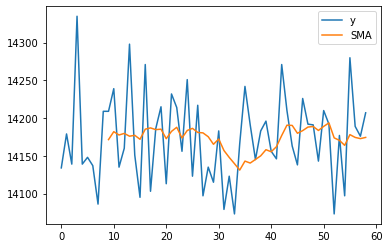

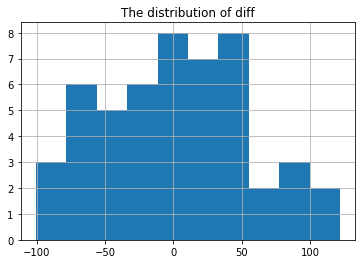

In [81]:
dataHawk_prophet_df_final['SMA'] = dataHawk_prophet_df_final.iloc[:,1].rolling(window=10).mean()
dataHawk_prophet_df_final['diff'] = dataHawk_prophet_df_final['y'] - dataHawk_prophet_df_final['SMA']
dataHawk_prophet_df_final[['y','SMA']].plot()
plt.figure()
dataHawk_prophet_df_final['diff'].hist()
plt.title('The distribution of diff')

In [82]:
dataHawk_prophet_df_final['upper'] = dataHawk_prophet_df_final['SMA'] + 2000
dataHawk_prophet_df_final['lower'] = dataHawk_prophet_df_final['SMA'] - 2000
dataHawk_prophet_df_final[10:20]

,ds,y,SMA,diff,upper,lower
10,2021-01-11,14239,14182.0,57.0,16182.0,12182.0
11,2021-01-12,14135,14177.6,-42.6,16177.6,12177.6
12,2021-01-13,14160,14179.7,-19.7,16179.7,12179.7
13,2021-01-14,14298,14176.0,122.0,16176.0,12176.0
14,2021-01-15,14151,14177.2,-26.2,16177.2,12177.2
15,2021-01-16,14095,14171.9,-76.9,16171.9,12171.9
16,2021-01-17,14271,14185.3,85.7,16185.3,12185.3
17,2021-01-18,14103,14187.0,-84.0,16187.0,12187.0
18,2021-01-19,14186,14184.7,1.3,16184.7,12184.7
19,2021-01-20,14215,14185.3,29.7,16185.3,12185.3


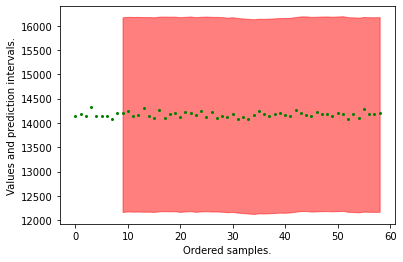

In [83]:
def plot_it():
    plt.plot(dataHawk_prophet_df_final['y'],'go',markersize=2,label='Actual')
    plt.fill_between(
       np.arange(dataHawk_prophet_df_final.shape[0]), dataHawk_prophet_df_final['lower'], dataHawk_prophet_df_final['upper'], alpha=0.5, color="r",
       label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    plt.show()
    
plot_it()

# Exponential Smoothing

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

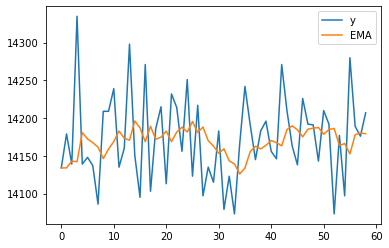

In [84]:
from statsmodels.tsa.api import SimpleExpSmoothing

EMAfit = SimpleExpSmoothing(dataHawk_prophet_df_final['y']).fit(smoothing_level=0.2,optimized=False)
EMA = EMAfit.forecast(3).rename(r'$\alpha=0.2$')
dataHawk_prophet_df_final['EMA'] = EMAfit.predict(start = 0)
dataHawk_prophet_df_final['diff'] = dataHawk_prophet_df_final['y'] - dataHawk_prophet_df_final['EMA']
dataHawk_prophet_df_final[['y','EMA']].plot()

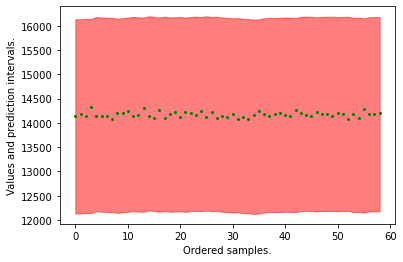

In [85]:
dataHawk_prophet_df_final['upper'] = dataHawk_prophet_df_final['EMA'] + 2000
dataHawk_prophet_df_final['lower'] = dataHawk_prophet_df_final['EMA'] - 2000
plot_it()

#  Seasonal-Trend Decomposition (STD)

<AxesSubplot:xlabel='ds'>

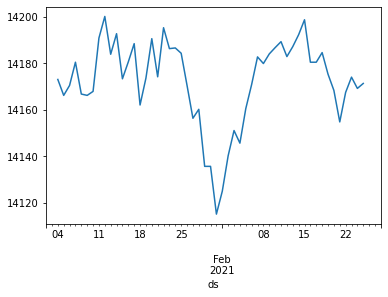

In [86]:
import pandas as pd
import statsmodels.api as sm

dataHawk_prophet_df_final = dataHawk_prophet_df_final.reset_index(drop='index') #inplace=True)
dataHawk_prophet_df_final.index = pd.to_datetime(dataHawk_prophet_df_final['ds'])

result = sm.tsa.seasonal_decompose(dataHawk_prophet_df_final['y'], model='additive')
result.trend[1:200].plot()

<AxesSubplot:xlabel='ds'>

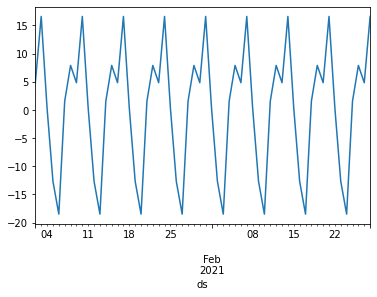

In [87]:
result.seasonal[1:100].plot()

<AxesSubplot:xlabel='ds'>

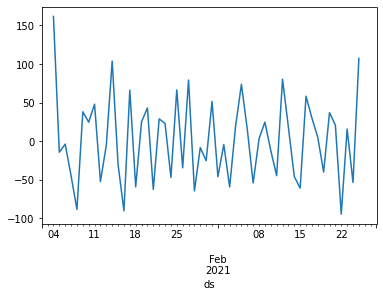

In [88]:
result.resid[1:200].plot()